In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("data/machinelearning.csv",encoding="utf-8")
df2 = pd.read_csv("data/datascience.csv",encoding="utf-8")
df3 = pd.read_csv("data/datascience2.csv",encoding="utf-8")
df4 = pd.read_csv("data/data_analyst.csv",encoding="utf-8")
df5 = pd.read_csv("data/ai.csv",encoding="utf-8")
df6 = pd.read_csv("data/indeed-blockchain-developer-india.csv",encoding="utf-8")
df7 = pd.read_csv("data/indeed-python-developer-india.csv",encoding="utf-8")
df8 = pd.read_csv("data/indeed-web-developer-india.csv",encoding="utf-8")

df = pd.concat([df1,df2,df3,df4,df5,df6,df7,df8], axis=0).drop_duplicates()
df.shape

(2046, 6)

In [3]:
df.head()

,Title,Location,Company,Salary,Sponsored,Description
0,Director - Machine learning,"Bengaluru, Karnataka",Zycus,None,Sponsored,Job Summary\r\nAbout Zycus-\r\nHeadquartered i...
1,Infosys NIA - Machine Learning,"Bengaluru, Karnataka",Infosys,None,Sponsored,Role Designation- Technology Lead\r\n\r\nRespo...
2,Consumer NBN Operations Manager,"Pune, Maharashtra",Telstra,None,Sponsored,About Telstra\r\nTelstra is Australia’s leadin...
3,Change-Senior Specialist,"Pune, Maharashtra",Telstra,None,Sponsored,About Telstra\r\nTelstra is Australia’s leadin...
4,Machine Learning Engineer,"Pune, Maharashtra",Emblaze Training & Services.,None,Organic,Responsibilities and Duties\r\nWe are hiring M...


In [4]:
df["Sponsored"].value_counts()

Organic      1863
Sponsored     183
Name: Sponsored, dtype: int64

In [5]:
df = df[df.Sponsored != 'Sponsored']
df.shape

(1863, 6)

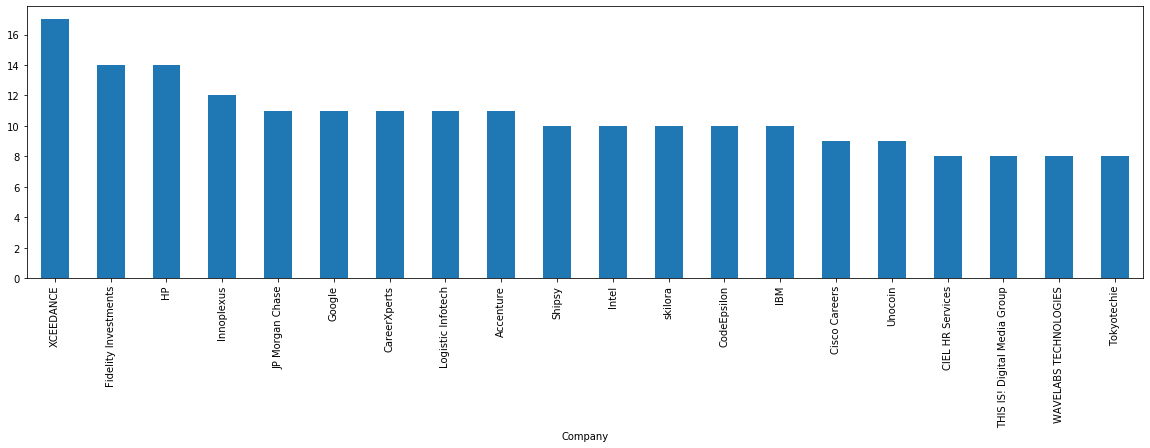

In [6]:
##Task 1: Find companies with highest number of job listings
counts = df.groupby("Company").count()["Title"].sort_values(ascending=False)[:20]
counts.plot(kind="bar",figsize=(20,5))

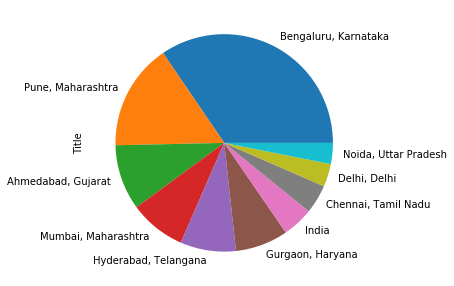

In [7]:
##Task 2: Find Locations with highest number of job listings
loc_counts = df.groupby("Location").count()["Title"].sort_values(ascending=False)[:10]
loc_counts.plot(kind='pie',figsize=(20,5))

In [8]:
loc_counts

Location
Bengaluru, Karnataka    497
Pune, Maharashtra       228
Ahmedabad, Gujarat      140
Mumbai, Maharashtra     121
Hyderabad, Telangana    119
Gurgaon, Haryana        113
India                    66
Chennai, Tamil Nadu      62
Delhi, Delhi             49
Noida, Uttar Pradesh     45
Name: Title, dtype: int64

In [9]:
def format_salary(row):
    salary = row["Salary"]
    if "-" in salary:
        split = salary.split("-")
        salary_min = split[0]
        salary_max = split[1]
    else:
        salary_min = salary
        salary_max = salary
    
    row["salary_min"] = salary_min.replace("₹","").replace("a month","").replace("a year","").replace(",","")
    row["salary_max"] = salary_max.replace("₹","").replace("a month","").replace("a year","").replace(",","")
       
    if "month" in row["Salary"]:
        row["salary_min"] = int(row["salary_min"])*12
        row["salary_max"] = int(row["salary_max"])*12
    
   
    return row


df_salary = df[df["Salary"]!= "None"].dropna()
df_salary = df_salary.apply(format_salary,axis=1) 

df_salary["salary_min"] = pd.to_numeric(df_salary["salary_min"],'coerce')
df_salary["salary_max"] = pd.to_numeric(df_salary["salary_max"],'coerce')

df_salary["salary_min"].mean()

123133.00597371566

In [10]:
def cleanData(desc):
    desc = word_tokenize(desc)
    desc = [word.lower() for word in desc if word.isalpha() and len(word) > 2]
    desc = [word for word in desc if word not in stop_words]
    return desc

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\NITASHA
[nltk_data]     GUPTA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import nltk
from nltk import word_tokenize

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

tags_df = df["Description"].apply(cleanData)
tags_df

4      [responsibilities, duties, hiring, machine, le...
5      [machine, learning, description, proficient, c...
6      [educational, qualification, experience, deplo...
7      [machine, learning, system, engineer, python, ...
8      [backend, engineer, wants, learn, data, scienc...
                             ...                        
418    [need, someone, good, html, css, bootstarp, li...
420    [looking, outstanding, web, developer, respons...
422    [looking, outstanding, web, developer, respons...
423    [looking, outstanding, web, developer, respons...
425    [hiring, experienced, web, developer, job, typ...
Name: Description, Length: 1863, dtype: object

In [13]:
from collections import Counter
result = tags_df.apply(Counter).sum().items()
result = sorted(result, key=lambda kv: kv[1],reverse=True)
result_series = pd.Series({k: v for k, v in result})

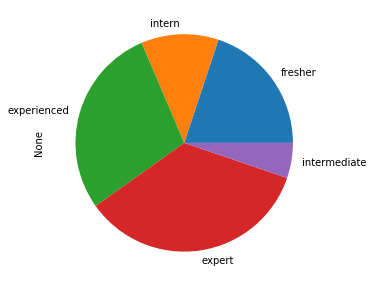

In [14]:
skills = ["begineer","fresher","intern","experienced","expert","intermediate"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='pie',figsize=(20,5))

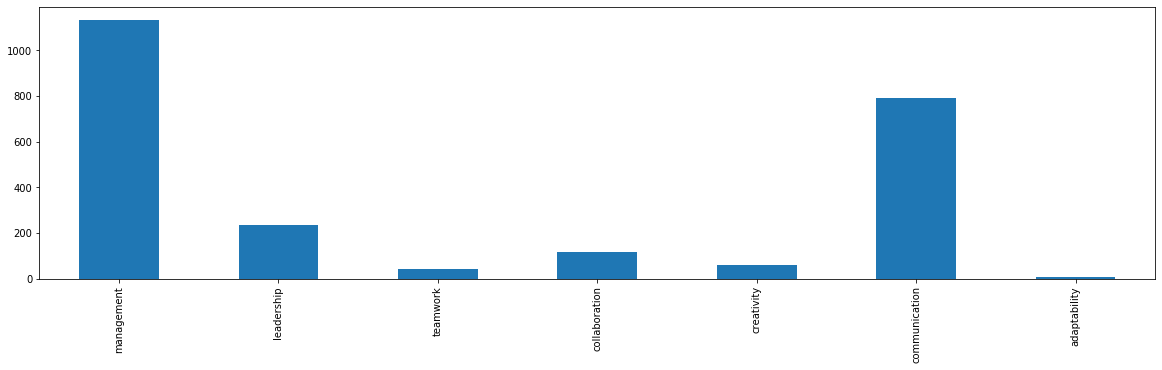

In [15]:
skills = ["management","leadership","teamwork","collaboration","creativity","communication","adaptability"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='bar',figsize=(20,5))

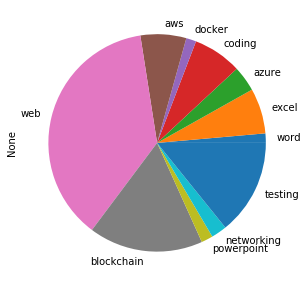

In [16]:
skills = ["word","excel","azure","coding","docker","aws","web","blockchain","powerpoint","networking","testing"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='pie',figsize=(20,5))

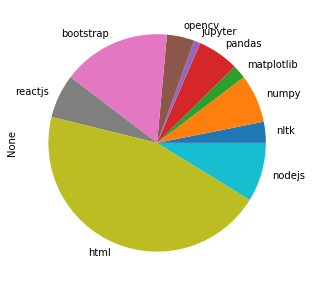

In [17]:
skills = ["nltk","numpy","matplotlib","pandas","jupyter","opencv","ai","bootstrap","reactjs","html","nodejs"]
filter_series = result_series.filter(items=skills)
filter_series.plot(kind='pie',figsize=(20,5))

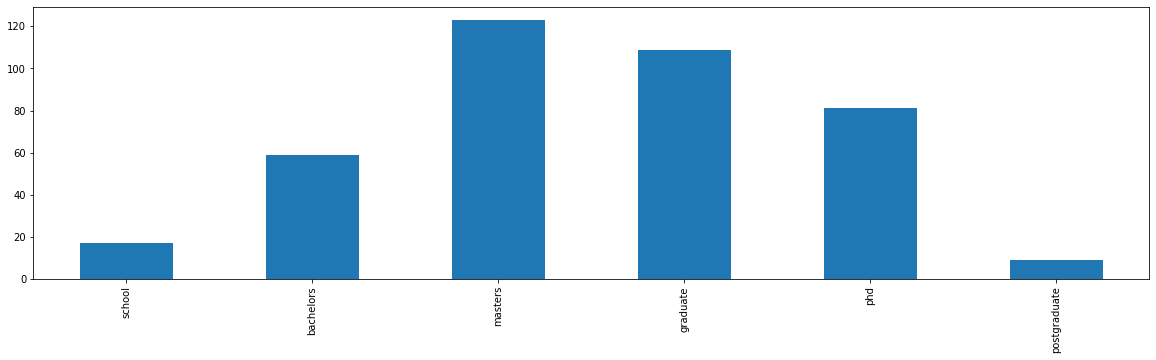

In [18]:
education = ["school","bachelors","masters","graduate","phd","postgraduate"]
filter_series = result_series.filter(items=education)
filter_series.plot(kind='bar',figsize=(20,5))

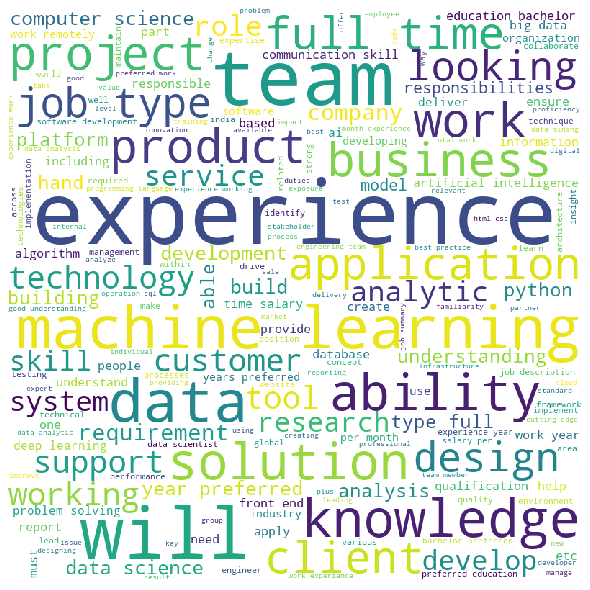

In [19]:
from wordcloud import WordCloud, STOPWORDS
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df["Description"]: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [20]:
!pip install wordcloud

You should consider upgrading via the 'c:\users\nitasha gupta\appdata\local\programs\python\python37\python.exe -m pip install --upgrade pip' command.


In [21]:
df["Latitude"] = np.nan
df["Longitude"] = np.nan
mask1=(df["Location"]=="Bengaluru, Karnataka")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(12.9716)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(77.5946)
mask1=(df["Location"]=="Pune, Maharashtra")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(18.5204)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(73.8567)
mask1=(df["Location"]=="Mumbai, Maharashtra")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(19.0760)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(72.8777)
mask1=(df["Location"]=="Hyderabad, Telangana")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(17.3850)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(78.4867)
mask1=(df["Location"]=="Gurgaon, Haryana")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(28.4595)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(77.0266)
mask1=(df["Location"]=="Delhi, Delhi")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(28.7041)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(77.1025)
mask1=(df["Location"]=="India")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(17.3850)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(78.4867)
mask1=(df["Location"]=="Chennai, Tamil Nadu")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(13.0827)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(80.2707)
mask1=(df["Location"]=="Noida, Uttar Pradesh")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(28.5355)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(77.3910)
mask1=(df["Location"]=="Ahmedabad, Gujarat")
df.loc[mask1,'Latitude']=df.loc[mask1,'Latitude'].fillna(23.0225)
df.loc[mask1,'Longitude']=df.loc[mask1,'Longitude'].fillna(72.5714)

In [22]:
df.head()

,Title,Location,Company,Salary,Sponsored,Description,Latitude,Longitude
4,Machine Learning Engineer,"Pune, Maharashtra",Emblaze Training & Services.,None,Organic,Responsibilities and Duties\r\nWe are hiring M...,18.5204,73.8567
5,Machine Learning,"Pune, Maharashtra",Zensar Technologies,None,Organic,Machine Learning - (0040426)\r\nDescription\r\...,18.5204,73.8567
6,Artificial Intelligence and Machine learning e...,"Ahmedabad, Gujarat",JB Solutions,None,Organic,Educational Qualification : B.E. / B.Tech / M....,23.0225,72.5714
7,Sr. Python Developer(Machine Learning Develope...,"Pune, Maharashtra",Ideal Enterprises,"₹35,000 - ₹50,000 a month",Organic,Machine Learning Developer/Recommendation Syst...,18.5204,73.8567
8,Machine Learning Engineer,"Pune, Maharashtra",Helpshift,None,Organic,Are you a backend engineer who wants to learn ...,18.5204,73.8567


In [23]:
list(loc_counts.index)

['Bengaluru, Karnataka',
 'Pune, Maharashtra',
 'Ahmedabad, Gujarat',
 'Mumbai, Maharashtra',
 'Hyderabad, Telangana',
 'Gurgaon, Haryana',
 'India',
 'Chennai, Tamil Nadu',
 'Delhi, Delhi',
 'Noida, Uttar Pradesh']

In [24]:
dfLoc = df[df["Location"].isin(list(loc_counts.index))]

In [25]:
dfLoc.head()

,Title,Location,Company,Salary,Sponsored,Description,Latitude,Longitude
4,Machine Learning Engineer,"Pune, Maharashtra",Emblaze Training & Services.,None,Organic,Responsibilities and Duties\r\nWe are hiring M...,18.5204,73.8567
5,Machine Learning,"Pune, Maharashtra",Zensar Technologies,None,Organic,Machine Learning - (0040426)\r\nDescription\r\...,18.5204,73.8567
6,Artificial Intelligence and Machine learning e...,"Ahmedabad, Gujarat",JB Solutions,None,Organic,Educational Qualification : B.E. / B.Tech / M....,23.0225,72.5714
7,Sr. Python Developer(Machine Learning Develope...,"Pune, Maharashtra",Ideal Enterprises,"₹35,000 - ₹50,000 a month",Organic,Machine Learning Developer/Recommendation Syst...,18.5204,73.8567
8,Machine Learning Engineer,"Pune, Maharashtra",Helpshift,None,Organic,Are you a backend engineer who wants to learn ...,18.5204,73.8567


In [26]:
import folium
from folium import plugins

m = folium.Map([21, 78], zoom_start=5)
for index, row in dfLoc.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=df[df['Location']==row['Location']].shape[0]/10,
                        popup=str(df[df['Location']==row['Location']].shape[0]),
                        fill_color="#3db7e4", # divvy color
                       ).add_to(m)

# convert to (n, 2) nd-array format for heatmap
#stationArr = dfLoc[['Latitude', 'Longitude']].to_numpy()

# plot heatmap
#m.add_children(plugins.HeatMap(stationArr, radius=15))
m

In [27]:
dfLoc.shape

(1440, 8)